In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('./data/wind/T1.csv')

In [9]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [10]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [11]:
df.head(3)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [13]:
df.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df['Date/Time'].min(), df['Date/Time'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 23:50:00'))

# EDA

In [17]:
df_indexed = df.set_index('Date/Time')

In [18]:
df_indexed.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [19]:
daily = df_indexed.resample('D').mean()
monthly = df_indexed.resample('W').mean()

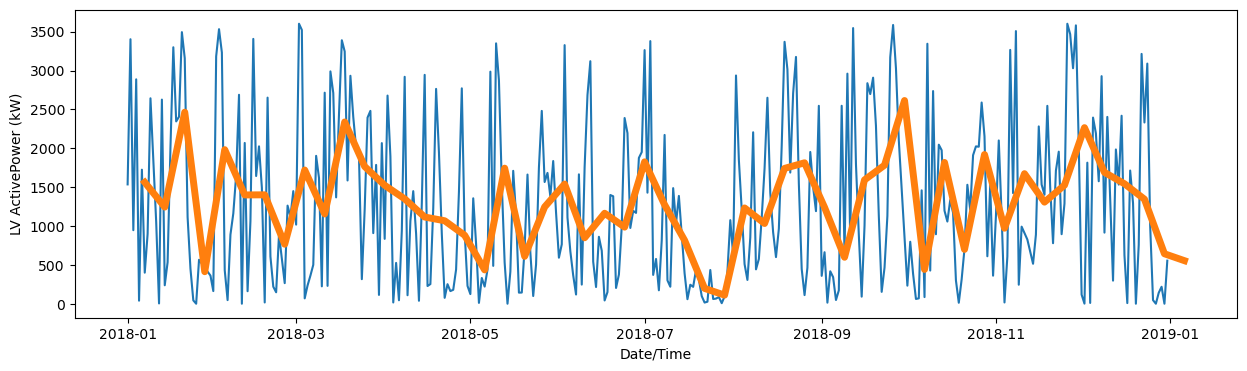

In [20]:
plt.figure(figsize=(15,4))
sns.lineplot(daily, x = daily.index, y = daily['LV ActivePower (kW)'])
sns.lineplot(monthly, x = monthly.index, y = monthly['LV ActivePower (kW)'], linewidth=5)
plt.show()

In [21]:
def get_time_features(df,date_col):
    df['month'] = df[date_col].dt.month
    df['week'] = df[date_col].dt.week
    df['dayofweek'] = df[date_col].dt.dayofweek
    df['day'] = df[date_col].dt.day
    df['hour'] = df[date_col].dt.hour
    
    return df

In [22]:
df_tf = get_time_features(df,'Date/Time')

C:\Users\druzh\AppData\Local\Temp\ipykernel_19792\3871232939.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df[date_col].dt.week


In [23]:
df_tf.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,week,dayofweek,day,hour
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,1,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,1,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,1,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,1,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,1,0


In [24]:
df_tf['dayofweek'][4]

0

In [25]:
lst = []
for i in range(len(df_tf)):
    if df_tf['dayofweek'][i] == 5 or df_tf['dayofweek'][i] == 6:
        lst.append(1)
    else:
        lst.append(0)
df_tf['is_weekend'] = lst

In [26]:
lst = []
for i in range(len(df_tf)):
    if df_tf['month'][i] in [1,2,12]:
        lst.append('winter')
    elif df_tf['month'][i] in [3,4,5]:
        lst.append('spring')
    elif df_tf['month'][i] in [6,7,8]:
        lst.append('summer')
    else:
        lst.append('autumn')
df_tf['season'] = lst

In [27]:
df_tf.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,week,dayofweek,day,hour,is_weekend,season
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,1,0,0,winter
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,1,0,0,winter
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,1,0,0,winter
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,1,0,0,winter
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,1,0,0,winter


In [28]:
df_tf.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [29]:
lst = []
for i in range(len(df_tf)):
    if df_tf['hour'][i] in range(9,21):
        lst.append('1')
    else:
        lst.append('0')
df_tf['day/night'] = lst # it can be more complicated bu using the exact location of the turbine or at least a middle point in turkey to get the exact time for sun rise and down

In [30]:
df_tf.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,week,dayofweek,day,hour,is_weekend,season,day/night
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,1,0,0,winter,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,1,0,0,winter,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,1,0,0,winter,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,1,0,0,winter,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,1,0,0,winter,0


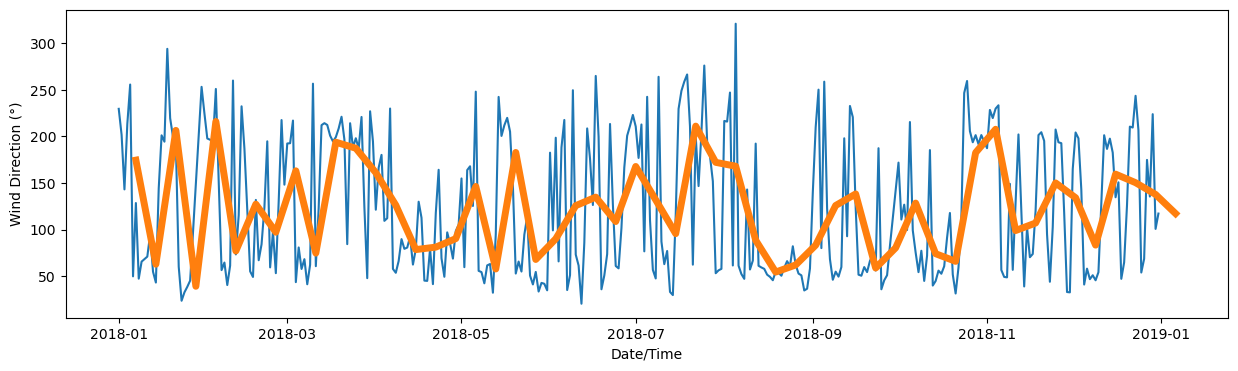

In [31]:
plt.figure(figsize=(15,4))
sns.lineplot(daily, x = daily.index, y = daily['Wind Direction (°)'])
sns.lineplot(monthly, x = monthly.index, y = monthly['Wind Direction (°)'], linewidth=5)
plt.show()

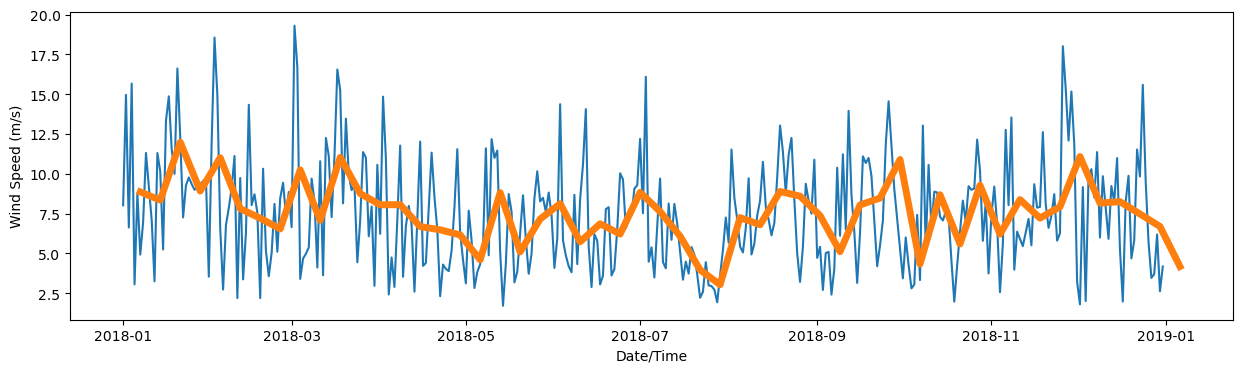

In [32]:
plt.figure(figsize=(15,4))
sns.lineplot(daily, x = daily.index, y = daily['Wind Speed (m/s)'])
sns.lineplot(monthly, x = monthly.index, y = monthly['Wind Speed (m/s)'], linewidth=5)
plt.show()

<Axes: >

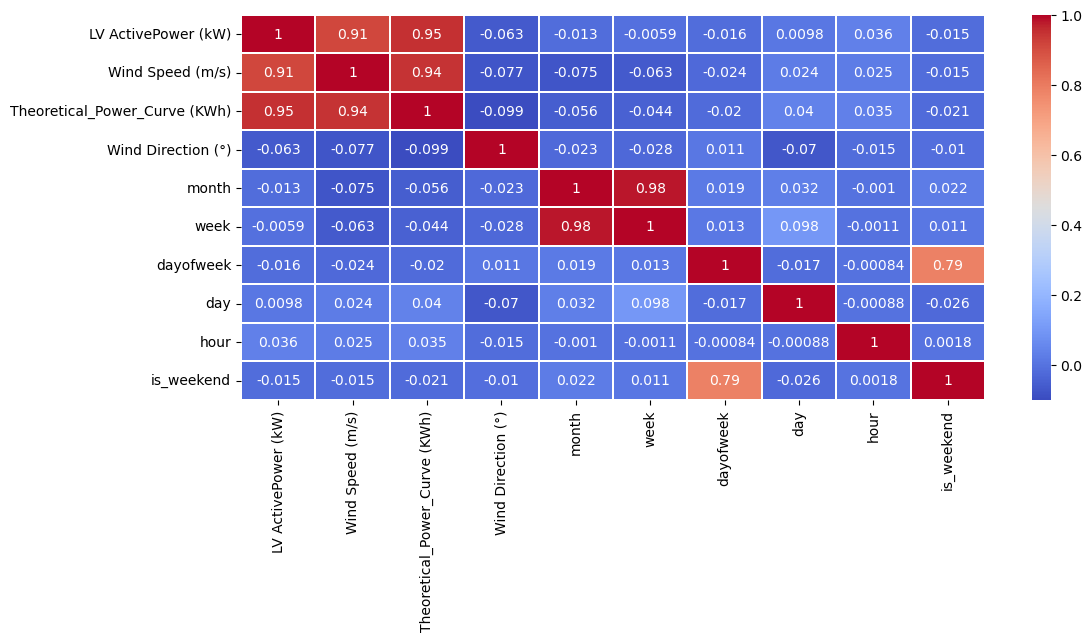

In [33]:
corr_matrix = df_tf.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr_matrix, annot=True, linewidth=0.1, cmap='coolwarm')

In [34]:
df_tf = pd.get_dummies(df_tf, columns=['season'])

In [215]:
df_tf.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,week,dayofweek,day,is_weekend,hour,day/night,season_autumn,season_spring,season_summer,season_winter
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,1,0,0,0,0,0,0,1
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,1,0,0,0,0,0,0,1
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,1,0,0,0,0,0,0,1
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,1,0,0,0,0,0,0,1
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,1,0,0,0,0,0,0,1


In [217]:
df_tf.drop('Date/Time',axis=1,inplace=True)

In [219]:
X=df_tf.copy()
y=X.pop('LV ActivePower (kW)')

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
X_train.columns

Index(['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)',
       'Wind Direction (°)', 'month', 'week', 'dayofweek', 'day', 'is_weekend',
       'hour', 'day/night', 'season_autumn', 'season_spring', 'season_summer',
       'season_winter'],
      dtype='object')

In [225]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [233]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor

model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42),
    # CatBoostRegressor(random_state=42,verbose=False)
]

for model in models:
    model.fit(X_train_scaled , y_train)
    y_pred = model.predict(X_test_scaled)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))
    models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df.sort_values("R2_score", ascending = False)

C:\Users\druzh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\druzh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

,Model-Name,R2_score,RMSE
7,XGBRegressor,98.286392,170.995625
4,ExtraTreesRegressor,97.843172,191.839021
2,RandomForestRegressor,97.575204,203.407442
6,DecisionTreeRegressor,95.530226,276.167139
0,GradientBoostingRegressor,94.973230,292.869192
8,XGBRFRegressor,94.746980,299.387533
3,LinearRegression,90.765974,396.939895
5,AdaBoostRegressor,85.248667,501.700836
1,SVR,85.030116,505.403693


# CNN

In [169]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,week,dayofweek,day,hour,is_weekend,season,day/night
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,0,1,0,0,winter,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,0,1,0,0,winter,0
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,0,1,0,0,winter,0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,0,1,0,0,winter,0
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,1,0,1,0,0,winter,0


In [185]:
df_power = df[['Date/Time','LV ActivePower (kW)']]

In [187]:
df_power.head()

,Date/Time,LV ActivePower (kW)
0,2018-01-01 00:00:00,380.047791
1,2018-01-01 00:10:00,453.769196
2,2018-01-01 00:20:00,306.376587
3,2018-01-01 00:30:00,419.645905
4,2018-01-01 00:40:00,380.650696


In [189]:
def get_sin_cos(df,datecol):
    df = df.copy()
    df['seconds'] = df[datecol].map(pd.Timestamp.timestamp)
    day = 60*60*24
    week = day * 7
    month = 30.436875 * day
    
    df['day_sin'] = np.sin(df['seconds'] * (2 * np.pi / day))
    df['day_cos'] = np.cos(df['seconds'] * (2 * np.pi / day))
    
    df['week_sin'] = np.sin(df['seconds'] * (2 * np.pi / week))
    df['week_cos'] = np.cos(df['seconds'] * (2 * np.pi / week))
    
    df['month_sin'] = np.sin(df['seconds'] * (2 * np.pi / month))
    df['month_cos'] = np.cos(df['seconds'] * (2 * np.pi / month))
    
    df.drop('seconds',axis=1,inplace=True)
    
    return df

In [191]:
df_power = get_sin_cos(df_power, 'Date/Time')

In [199]:
df_power.index = df_power['Date/Time']
df_power.drop('Date/Time',axis=1,inplace = True)

In [201]:
df_power.head()

,LV ActivePower (kW),day_sin,day_cos,week_sin,week_cos,month_sin,month_cos
Date/Time,,,,,,,
2018-01-01 00:00:00,380.047791,-2.389847e-12,1.000000,-0.433884,-0.900969,0.074248,0.997240
2018-01-01 00:10:00,453.769196,4.361939e-02,0.999048,-0.439491,-0.898247,0.075677,0.997132
2018-01-01 00:20:00,306.376587,8.715574e-02,0.996195,-0.445082,-0.895490,0.077107,0.997023
2018-01-01 00:30:00,419.645905,1.305262e-01,0.991445,-0.450655,-0.892698,0.078536,0.996911
2018-01-01 00:40:00,380.650696,1.736482e-01,0.984808,-0.456211,-0.889872,0.079965,0.996798


In [204]:
def get_seq(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
        
    return np.array(X), np.array(y)

In [210]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [230]:
df_power['LV ActivePower (kW)'] = scaler.fit_transform(pd.DataFrame(df_power['LV ActivePower (kW)']))

In [232]:
df_power.head()

,LV ActivePower (kW),day_sin,day_cos,week_sin,week_cos,month_sin,month_cos
Date/Time,,,,,,,
2018-01-01 00:00:00,-0.706800,-2.389847e-12,1.000000,-0.433884,-0.900969,0.074248,0.997240
2018-01-01 00:10:00,-0.650629,4.361939e-02,0.999048,-0.439491,-0.898247,0.075677,0.997132
2018-01-01 00:20:00,-0.762932,8.715574e-02,0.996195,-0.445082,-0.895490,0.077107,0.997023
2018-01-01 00:30:00,-0.676628,1.305262e-01,0.991445,-0.450655,-0.892698,0.078536,0.996911
2018-01-01 00:40:00,-0.706340,1.736482e-01,0.984808,-0.456211,-0.889872,0.079965,0.996798


In [234]:
X_seq, y_seq = get_seq(df_power, window_size=10)

In [236]:
X_seq.shape, y_seq.shape

((50520, 10, 7), (50520,))

In [238]:
X_train, y_train = X_seq[:40000], y_seq[:40000]
X_val, y_val = X_seq[40000:44000], y_seq[40000:44000]
X_test, y_test = X_seq[44000:], y_seq[44000:]

In [309]:
X_train.shape

(40000, 10, 7)

In [250]:
from keras import layers
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [333]:
model_CNN_1 = Sequential([
    
    layers.Input((X_train.shape[1],X_train.shape[2])),
    layers.Conv1D(64, kernel_size=2, activation='relu'),
    layers.Flatten(),
    layers.Dense(7, activation='relu'),
    layers.Dense(1, activation='linear')
    
])

model_CNN_1.summary()

cp = ModelCheckpoint('./models_Wind/', save_best_only=True)
early = EarlyStopping(monitor='val_loss', patience=10)
model_CNN_1.compile(loss = 'mse', optimizer = Adam(), metrics = ['mse'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 9, 64)             960       
                                                                 
 flatten_8 (Flatten)         (None, 576)               0         
                                                                 
 dense_16 (Dense)            (None, 7)                 4039      
                                                                 
 dense_17 (Dense)            (None, 1)                 8         
                                                                 
Total params: 5007 (19.56 KB)
Trainable params: 5007 (19.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [335]:
model_CNN_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp,early])

Epoch 1/30
1230/1250 [============================>.] - ETA: 0s - loss: 0.0570 - mse: 0.0570INFO:tensorflow:Assets written to: ./models_Wind\assets


INFO:tensorflow:Assets written to: ./models_Wind\assets


1250/1250 [==============================] - 5s 3ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 2/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 3/30
1241/1250 [============================>.] - ETA: 0s - loss: 0.0379 - mse: 0.0379INFO:tensorflow:Assets written to: ./models_Wind\assets


INFO:tensorflow:Assets written to: ./models_Wind\assets


1250/1250 [==============================] - 3s 3ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 4/30
1231/1250 [============================>.] - ETA: 0s - loss: 0.0368 - mse: 0.0368INFO:tensorflow:Assets written to: ./models_Wind\assets


INFO:tensorflow:Assets written to: ./models_Wind\assets


1250/1250 [==============================] - 3s 3ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 5/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 6/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0384 - val_mse: 0.0384
Epoch 7/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 8/30
1238/1250 [============================>.] - ETA: 0s - loss: 0.0357 - mse: 0.0357INFO:tensorflow:Assets written to: ./models_Wind\assets


INFO:tensorflow:Assets written to: ./models_Wind\assets


1250/1250 [==============================] - 3s 3ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 9/30
1236/1250 [============================>.] - ETA: 0s - loss: 0.0353 - mse: 0.0353INFO:tensorflow:Assets written to: ./models_Wind\assets


INFO:tensorflow:Assets written to: ./models_Wind\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 10/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 11/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 12/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 13/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 14/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 15/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 16/30
1250/1250 [==============================] - 3s 2ms/ste

INFO:tensorflow:Assets written to: ./models_Wind\assets


1250/1250 [==============================] - 4s 3ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 18/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 19/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 20/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 21/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 22/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 23/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 24/30
1247/1250 [============================>.] - ETA: 0s - 

INFO:tensorflow:Assets written to: ./models_Wind\assets


1250/1250 [==============================] - 3s 3ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 25/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 26/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 27/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 28/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 29/30
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 30/30
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.0366 - val_mse: 0.0366


In [396]:
def get_predictions_postprocessed(model, X, y):
    predictions = model.predict(X).flatten()
    predictions = scaler.inverse_transform(pd.DataFrame(predictions)).flatten()
    p_actuals = scaler.inverse_transform(pd.DataFrame(y)).flatten()
    df = pd.DataFrame(data={'Power Predictions': predictions,
                          'Power Actuals': p_actuals
                          })
    plt.plot(df['Power Predictions'][0:500])
    plt.plot(df['Power Actuals'][0:500])
    plt.legend(['Predicted Power','Real Power'])
    
    return df

204/204 [==============================] - 1s 3ms/step


,Power Predictions,Power Actuals
0,3091.353271,3561.138916
1,3450.500488,3564.975098
2,3503.088867,3473.443115
3,3443.245117,3191.033936
4,3193.422119,2790.708008
...,...,...
6515,3517.128418,2963.980957
6516,2798.108887,1684.353027
6517,1539.334717,2201.106934
6518,2487.884766,2515.694092


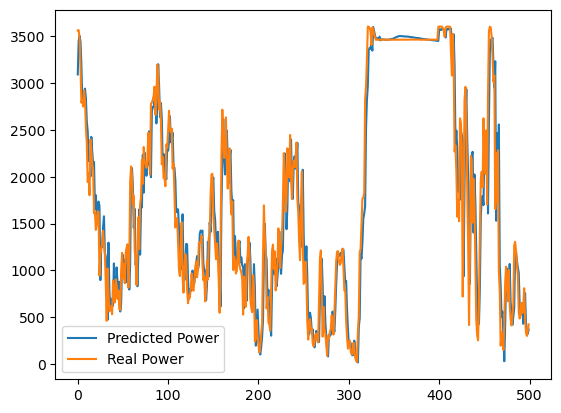

In [398]:
get_predictions_postprocessed(model_CNN_1, X_test, y_test)